# PRJNA1212683 - Afonso et al.

Article link: [https://www.nature.com/articles/s41598-025-94323-4](https://www.nature.com/articles/s41598-025-94323-4).

In [1]:
suppressPackageStartupMessages({
    library(provoc)
    library(here)
    library(ggplot2)
    library(lubridate)
})


In [2]:
coco <- read.csv(here("data/processed/PRJNA1212683_processed.csv.gz"))
coco$mutation <- parse_mutations(coco$label)
head(coco)


,position,label,mutation,frequency,coverage,count,sra,date,sample_name,avg_spot_len,bases,bioproject,location,ww_population
,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<lgl>
1,10025,+10026.A,ins:10026:1,0,1442,0,SRR32063050,2022-05-19T00:00:00Z,PET111-2,273,110329629,PRJNA1212683,Petange,NA
2,10046,+10047.T,ins:10047:1,0,1490,0,SRR32063050,2022-05-19T00:00:00Z,PET111-2,273,110329629,PRJNA1212683,Petange,NA
3,10059,+10060.T,ins:10060:1,0,1482,0,SRR32063050,2022-05-19T00:00:00Z,PET111-2,273,110329629,PRJNA1212683,Petange,NA
4,10248,+10249.T,ins:10249:1,0,1518,0,SRR32063050,2022-05-19T00:00:00Z,PET111-2,273,110329629,PRJNA1212683,Petange,NA
5,1026,+1027.T,ins:1027:1,0,962,0,SRR32063050,2022-05-19T00:00:00Z,PET111-2,273,110329629,PRJNA1212683,Petange,NA
6,10293,+10294.T,ins:10294:1,0,1490,0,SRR32063050,2022-05-19T00:00:00Z,PET111-2,273,110329629,PRJNA1212683,Petange,NA


In [3]:
lineages_in_paper <- c("B.1.1.7", "B.1.351", "B.1.617.2", "B.1.1.529", "P.1")
barcodes <- provoc::usher_barcodes()
available_lineages <- intersect(lineages_in_paper, rownames(barcodes))
barcodes <- filter_lineages(barcodes, available_lineages)
dim(barcodes)


[1]  5 95

In [4]:
system.time(
    res <- provoc(count / coverage ~ .,
        data = coco,
        lineage_defs = barcodes,
        by = "sra")
)
head(res)


   user  system elapsed 
 10.232   0.618  10.983 

,rho,ci_low,ci_high,lineage,sra,date,sample_name,avg_spot_len,bases,bioproject,location,ww_population
,<dbl>,<lgl>,<lgl>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<lgl>
1,7.673610e-01,NA,NA,B.1.1.529,SRR32063050,2022-05-19T00:00:00Z,PET111-2,273,110329629,PRJNA1212683,Petange,NA
2,3.487134e-04,NA,NA,B.1.1.7,SRR32063050,2022-05-19T00:00:00Z,PET111-2,273,110329629,PRJNA1212683,Petange,NA
3,3.967029e-05,NA,NA,P.1,SRR32063050,2022-05-19T00:00:00Z,PET111-2,273,110329629,PRJNA1212683,Petange,NA
4,1.065209e-04,NA,NA,B.1.351,SRR32063050,2022-05-19T00:00:00Z,PET111-2,273,110329629,PRJNA1212683,Petange,NA
5,4.987526e-10,NA,NA,B.1.617.2,SRR32063050,2022-05-19T00:00:00Z,PET111-2,273,110329629,PRJNA1212683,Petange,NA
6,6.881353e-01,NA,NA,B.1.1.529,SRR32063051,2022-05-26T00:00:00Z,SCH112-2,267,59093549,PRJNA1212683,Schifflange,NA


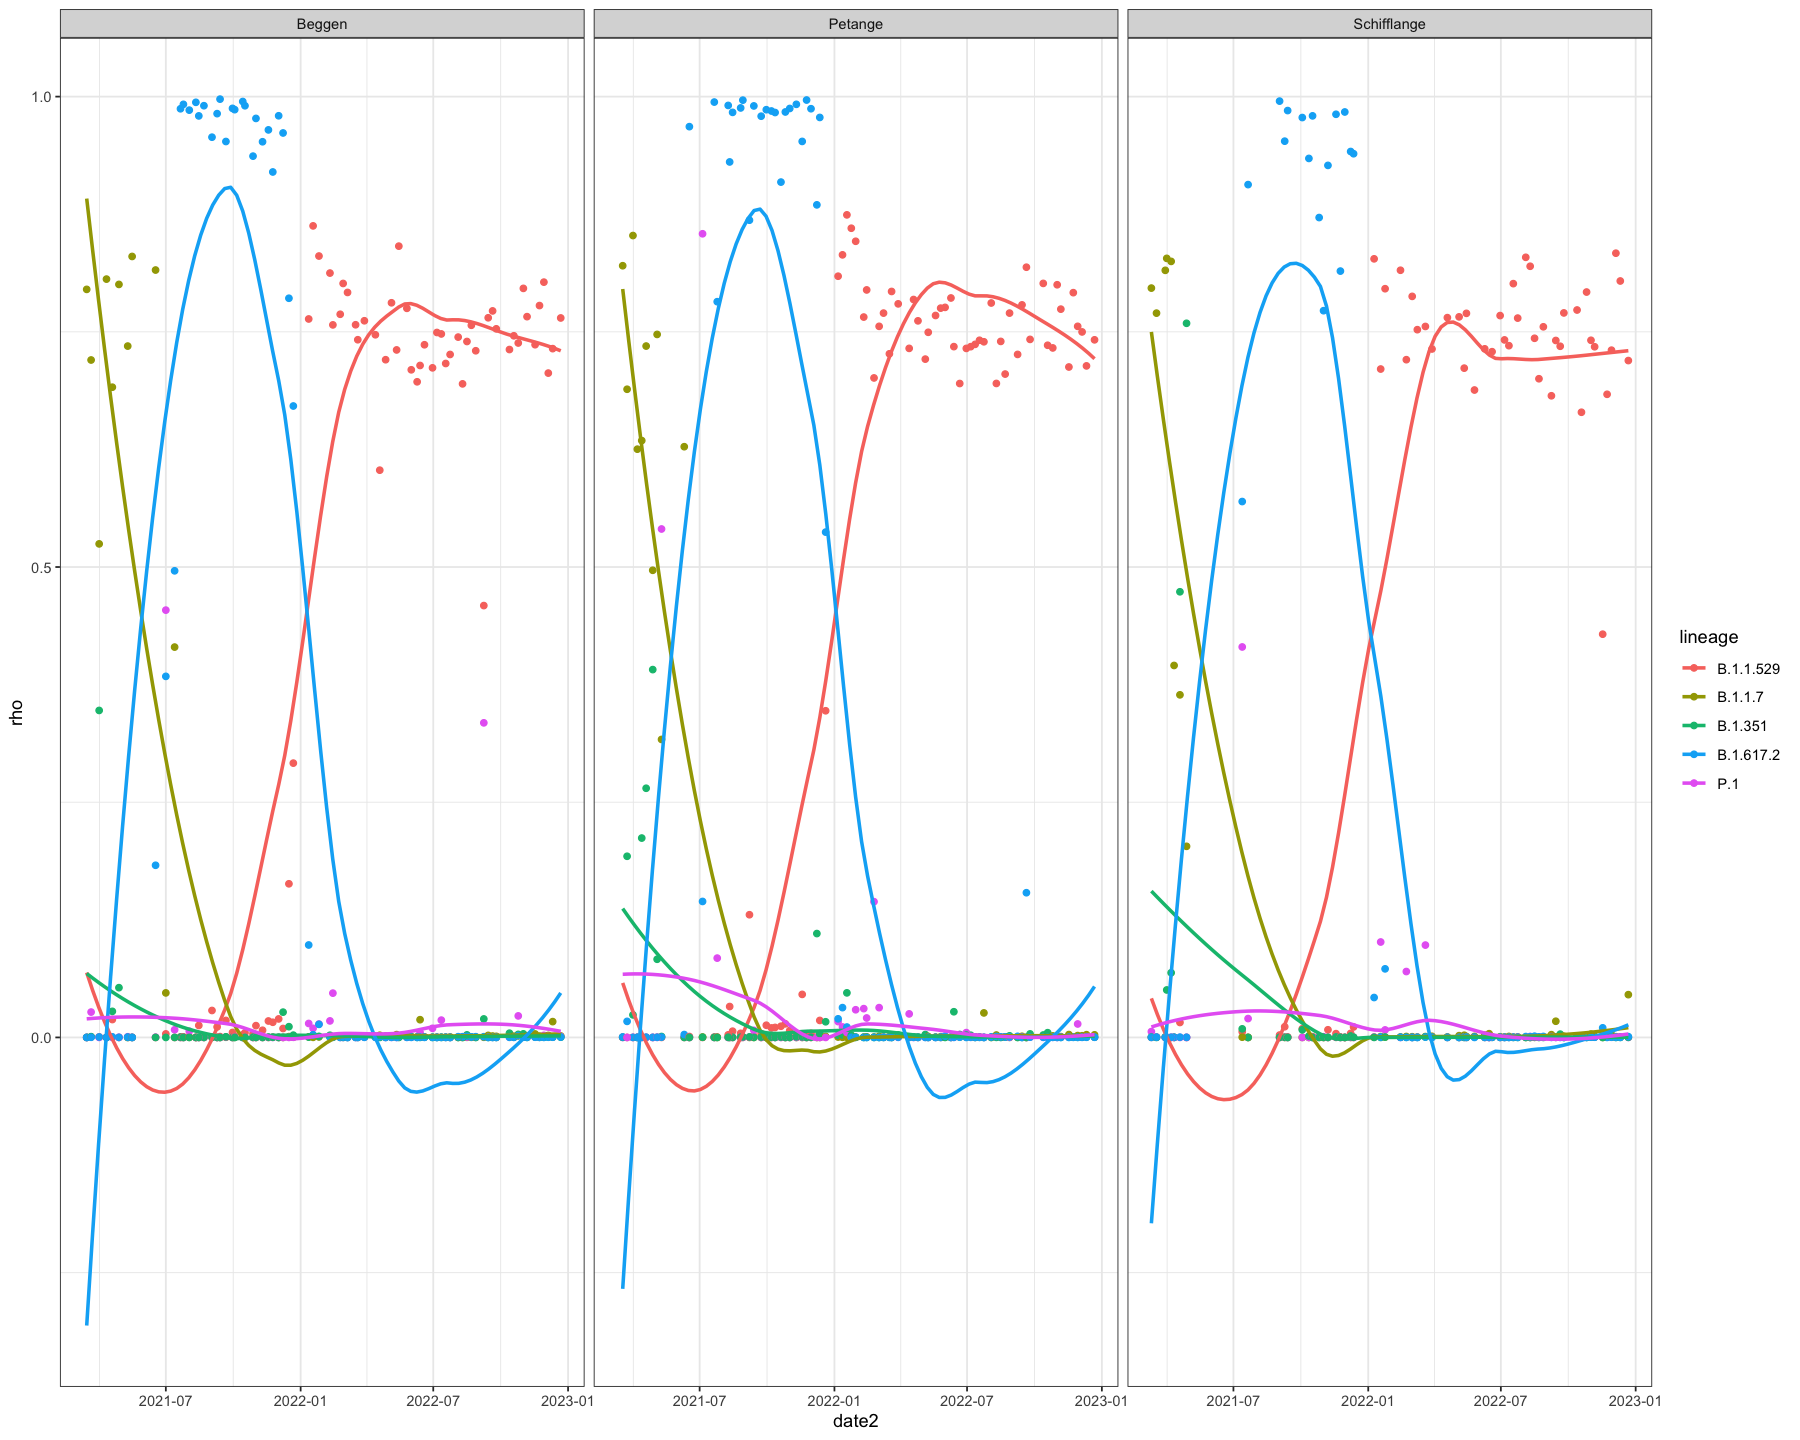

In [5]:
options(repr.plot.width = 15, repr.plot.height = 12)

res$date2 <- res$date |> ymd_hms() |> ymd()

ggplot(res) +
    aes(x = date2, y = rho, colour = lineage) +
    geom_point() + facet_wrap(~location) +
    geom_smooth(formula = y ~ x, se = FALSE, method = "loess") +
    theme_bw()
